## einops 里的常用的操作

In [ ]:
# einops 里的常用的操作
from einops import rearrange,repeat,reduce,einsum
from einops.layers.torch import Rearrange,Reduce
import torch

""" 
1. rearrange
重新排列张量的维度，支持维度重排、合并、拆分等操作
output = rearrange ( tensor , pattern , ** axes_lengths )
param:
    tensor ：输入张量。 
    pattern ：描述维度变换的字符串。 
    axes_lengths ：可选参数，用于指定新维度的长度。
"""
# 将高度和宽度合并为空间维度
x = torch.randn(3, 32, 32) # [C, H, W]
y = rearrange(x, 'c h w -> h w c') # [H, W, C]

# 将通道维度拆分为 [C1, C2]
x = torch.randn(32,64,14,14)
y = rearrange(x,'b (c1 c2) h w -> b c1 c2 h w',c1 = 8)


"""
2. reduce
reduce 的核心功能是在指定维度上进行聚合操作，
支持以下聚合操作：
    求和 （ "sum" ） 均值 （ "mean" ） 最大值 （ "max" ） 最小值 （ "min" ） 乘积 （ "prod" ）
output = reduce ( tensor , pattern , reduction , ** axes_lengths )
param:
    tensor ：输入张量。 
    pattern ：描述维度变换和聚合的字符串。 
    reduction ：聚合操作类型（如 "sum" 、 "mean" 等）。 
    axes_lengths ：可选参数，用于指定新维度的长度。
"""
# 简单聚合，对通道维度平均
x = torch.randn(3, 32, 32)
y = reduce(x, "b c h -> b c", reduction="mean")
print(y.shape)
# 求和聚合以及最大最小值等都是一样的    


"""
3. repeat
repeat 的核心功能是在指定维度上重复张量的数据
output = repeat ( tensor , pattern , ** axes_lengths )
param:
    tensor ：输入张量。 
    pattern ：描述维度变换和重复的字符串。 
    axes_lengths ：可选参数，用于指定新维度的长度。
ps!!! einops 的模式语法要求每个维度名称必须是唯一的
"""
# 在单个维度上重复
x = torch.tensor([1,2,3]) # shape:[3]
y = repeat(x,'b -> (b rep)', rep = 3)
print(y) # tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])

# 在单个维度上重复
x = torch.tensor([1,2,3])
y = repeat(x,'b -> (rep b)', rep = 3)
print(y) # tensor([1, 2, 3, 1, 2, 3, 1, 2, 3])

# 在多个维度上重复
x = torch.tensor([[1,2],[3,4]]) # shape:[2,2]
y = repeat(x,'b c -> (b rep) (c rep1)', rep = 3,rep1 = 3) # einops 的模式语法要求每个维度名称必须是唯一的
print(y)

# 广播式重复，添加一个新维度并重复
x = torch.tensor([1,2,3]) # shape: [3]
y = repeat(x, 'b -> c b' ,c = 2)
print(y) # tensor([[1, 2, 3],[1, 2, 3]])

"""
4. einsum
einsum(爱因斯坦求和约定）是一种强大的工具，用于表示和执行张量之间的复杂操作，如矩阵乘法、点积、外积、转置等。它的核心思想是通过下标符号来描述张量之间的操作，而不需要显式地编写循环或调用特定的函数。
output = einsum (* tensors, equation  )
param: 
    equation ：描述操作的字符串，使用下标符号表示输入和输出张量的维度。 
    *tensors ：参与操作的张量。   
隐含规则！！！所有未出现在输出的维度会被求和
"""
# 矩阵乘法
A = torch.randn(1, 2, 3, 4)  # Shape: [1, 2, 3, 4]
B = torch.randn(1, 2, 4, 6)  # Shape: [1, 2, 4, 6]
C = einsum(A,B,"b s i j, b s j k -> b s i k")
print(C.shape)  # 输出: [1, 2, 3, 6]

# 点积
A = torch.randn(2,3)
B = torch.randn(2,3)
C = einsum(A,B,'a b,a b -> a') # A和B每一行的对应位置做乘法求和
print(C)

"""
5. torch中的tensor和numpy的转换
param:
    detach(): 是 PyTorch 中 torch.Tensor 的一个方法，用于从计算图中分离张量，生成一个新的张量。这个新张量不再追踪梯度，也不会参与反向传播。
    cpu(): 是 PyTorch 中 torch.Tensor 的一个方法，用于将张量从 GPU（或其他设备，如 CUDA）移动到 CPU 内存。
"""
# tensor -> numpy
tensor = torch.randn(2,3,4)
numpy_array = tensor.detach().cpu().numpy()

# numpy -> tensor
tensor = torch.as_tensor(numpy_array)

torch.Size([3, 32])
tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])
tensor([1, 2, 3, 1, 2, 3, 1, 2, 3])
tensor([[1, 1, 1, 2, 2, 2],
        [1, 1, 1, 2, 2, 2],
        [1, 1, 1, 2, 2, 2],
        [3, 3, 3, 4, 4, 4],
        [3, 3, 3, 4, 4, 4],
        [3, 3, 3, 4, 4, 4]])
tensor([[1, 2, 3],
        [1, 2, 3]])
torch.Size([1, 2, 3, 6])
tensor([ 0.0557, -2.0250])


## torch 里的常用操作

#### 1. 张量操作

In [ ]:
import torch

"""1. 创建张量"""
x = torch.randn(3,4) # 正态分布随机数
x = torch.zeros(3,4) # 创建全零张量
y = torch.randn_like(x,dtype=torch.float16) # 创建和x形状一样的正态分布随机数
y = torch.zeros_like(x) # 创建和x形状一样的全0张量
x = x.to(torch.float32)

"""2. 数学运算"""
# 执行广义上的张量乘法, 对于高维张量, 对最后两个维度进行矩阵乘法
x = torch.randn(1,2,3,4)
y = torch.randn(1,2,4,5)

c1 = x@y # 矩阵乘法
print(c1.shape) # torch.Size([1, 2, 3, 5])

c2 = torch.matmul(x,y) # 和@操作等价
print(c2.shape)

"""
广播机制（Broadcasting）允许在不同形状的张量（或数组）之间进行逐元素操作，而无需显式地扩展它们的形状。
广播机制的核心思想是:
    自动扩展较小张量的形状，使其与较大张量的形状兼容 ，从而支持逐元素操作。
"""
# 向量与标量的加法
x = torch.tensor([1,2,3])
y = 2
c = x + y   # 应用广播机制将 y 扩展为[2,2,2]
# 矩阵与向量的加法
x = torch.tensor([[1,2,3],[4,5,6]])
y = torch.tensor([1,2,3])
c = x + y   # 应用广播机制将 y 扩展为 [[1,2,3],[1,2,3]]

# squeeze() 和 unsqueeze()
"""
torch.squeeze(input, dim=None)
param:
    input : 输入张量。 
    dim : 可选参数，指定要删除的维度。如果未指定，则删除所有大小为 1 的维度。
"""
x = torch.randn(1,3,1,2)
y = torch.squeeze(x)    # 未指定维度，删除所有大小为1的维度
print(y.shape)          # (3,2)

y = torch.squeeze(x,dim =1) # 指定维度大小不为1，不执行删除维度的操作
print(y.shape)              # (1,3,1,2)
"""
unsqueeze() 用于 在指定位置添加一个大小为 1 的维度 ，从而扩展张量的形状。
torch.unsqueeze(input, dim)
param:
    input : 输入张量。 
    dim : 指定要添加维度的位置（从 0 开始）
"""


# stack() 和 cat()
# 创建批次
sample1 = torch.randn(3, 4)  # 形状: (3, 4)
sample2 = torch.randn(3, 4)  # 形状: (3, 4)
batch1 = torch.stack([sample1, sample2], dim=0)  # 形状: (2, 3, 4)
batch2 = torch.stack([sample1,sample2], dim=0)   # 形状: (6,4)
batch3 = torch.stack([sample1, sample2], dim=1)  # 形状: (3, 2, 4)
print(batch3.shape)


torch.Size([1, 2, 3, 5])
torch.Size([1, 2, 3, 5])
torch.Size([3, 2])
torch.Size([1, 3, 1, 2])
torch.Size([3, 2, 4])


### 总结

1. 基本网络，包括unet，vit，以及diffusion基本框架，还有各种normalize的操作
2. 常用的损失函数和评价指标的计算
3. python中基本的数据结构和lambda函数以及各种基本操作，还有numpy的基本操作以及绘图
4. 模型训练的框架，和数据集的构造等
5. 完成一些题目

## python中的基本操作，包括lambda函数，数据结构以及numpy和绘图等

In [8]:
"""
lambda 函数和各种操作
语法: 
    lambda 参数1, 参数2, ... : 表达式
"""
from einops import rearrange
import torch
# 定义一个print函数和add函数
pri = lambda x: print(x)
pri(1)
add = lambda x,y : x + y
pri(add(3,5)) # 8

"""
将map函数和lambda函数结合
map(function, iterable, ...)
param:
    function ：要应用到每个元素上的函数。 
    iterable ：一个或多个可迭代对象（如列表、元组等）
"""
# 对列表中每个元素进行平方和
numbers = [1,2,3,4]
results = list(map(lambda t: t**2,numbers))
pri(results)

# 将qkv花开成q,k,v
heads = 4
dim_heads = 8
# to_qkv 将输入的 x 变成 heads * dim_heads * 3
qkv = torch.randn(1,96,128,128)
qkv = qkv.chunk(3,dim=1) # 结果是一个包含 3 个张量的元组，每个张量的形状为 (1, 32, 128, 128) 。 分别对应 Query、Key、Value 。
q,k,v = map(lambda t: rearrange(t,'b (h c) x y -> b h c (x y)',h = heads),qkv)
pri(q.shape) # torch.Size([1, 4, 8, 16384])

1
8
[1, 4, 9, 16]
torch.Size([1, 4, 8, 16384])


In [ ]:
"""
numpy常用操作
"""
import numpy as np
import torch
# 创建数组
a = np.array([1,2,3])
b = np.zeros((3,3)) # torch.zeros(3,3)
c = np.ones((3,3))
d = np.full((3,3),5) # 填充指定的值
e = np.random.rand(3,3) # 0,1之间的随机数 == torch.rand(3,3)
f = torch.randn(3,3) # 标准正态分布的随机数
g = np.arange(0,10,2) # 输出: array([0, 2, 4, 6, 8])
h = np.linspace(0,1,5) # 输出: array([0.  , 0.25, 0.5 , 0.75, 1.  ])

# 常用属性
a.shape    # 数组形状
a.dtype    # 数据类型
a.size     # 元素总数
a.ndim     # 数组维度

# 形状操作
a = np.array([[1,2,3],[4,5,6]])
b = np.random.randn(4,3)
a = a.reshape((3,2))
a = a.T
c = np.concatenate([a,b],axis = 0)

# 随机种子
np.random.seed(42)

# 标准化
data = np.random.randn(100,3)
mean = np.mean(data,axis=0)
std = np.var(data,axis=0)
normalized_data = (data - mean) / std

# 点积
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
result = np.sum(a * b)  # sum([4 10 18])

# 矩阵乘法
print(np.dot(a,b.T))

# 条件操作
a = np.array([1,2,3])
mask = a > 1
print(a[mask])

# TODO
"""深拷贝，浅拷贝，轴操作（cat，sum，mean）等，以及和tensor的转换"""

32
[2 3]


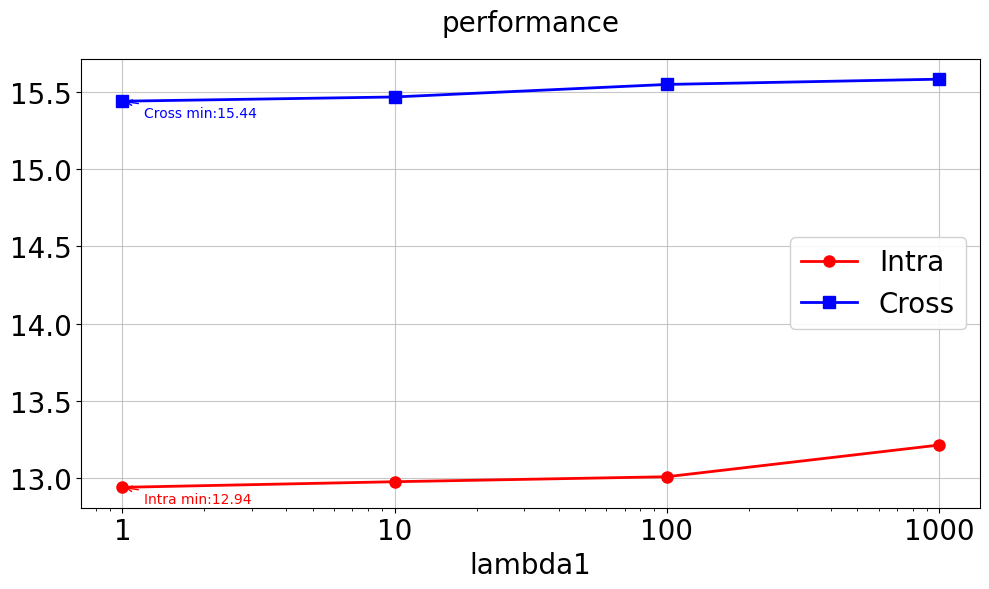

In [27]:
# 绘图
import matplotlib.pyplot as plt
import numpy as np

lambda1 = np.array([1,10,100,1000])
intra_psnr = [12.94, 12.9762, 13.0085, 13.2138]
cross_psnr = [15.44, 15.4675, 15.5486, 15.5826]

plt.figure(figsize = (10,6), dpi = 100)
plt.grid(True,linestyle = '-', alpha = 0.7)

intra_line, = plt.plot(lambda1,intra_psnr,
                       marker = 'o',
                       color = 'red',
                       linewidth = 2,
                       markersize = 8,
                       label = 'Intra')
cross_line, = plt.plot(lambda1,cross_psnr,
                       marker = 's',
                       color = 'blue',                       
                       linewidth = 2,
                       markersize = 8,
                       label = 'Cross')

intra_minIndex = np.argmin(intra_psnr)
cross_minIndex = np.argmin(cross_psnr)

plt.annotate(f'Intra min:{intra_psnr[intra_minIndex]}',
             xy = (lambda1[intra_minIndex], intra_psnr[intra_minIndex]),
             xytext=(lambda1[intra_minIndex] * 1.2,intra_psnr[intra_minIndex] - 0.1),
             arrowprops=dict(arrowstyle = '->',color = 'red'),
             fontsize = 10,
             color = 'red'
)
plt.annotate(f'Cross min:{cross_psnr[cross_minIndex]}',
             xy = (lambda1[cross_minIndex],cross_psnr[cross_minIndex]),
             xytext=(lambda1[cross_minIndex] * 1.2, cross_psnr[cross_minIndex] - 0.1),
             arrowprops=dict(arrowstyle = '->',color = 'blue'),
             fontsize = 10,
             color = 'blue'

)

plt.title('performance',fontsize = 20,pad = 20)
plt.xlabel('lambda1',fontsize = 20)
plt.xscale('log')
plt.xticks(lambda1,labels=['1','10','100','1000'],fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend(fontsize = 20,loc = 'center right',framealpha = 0.9)
plt.tight_layout()

plt.show()






## 各种经典模型

### Unet-attn

In [ ]:
#  Unet-attn
import math
import torch.nn as nn
import torch.nn.functional as F
from functools import partial
# 必要的辅助函数
def exists(val):
    return val is not None

def default(val,d):
    return val if exists(val) else d

def is_power_two(n):
    return math.log2(n).is_integer()

def divisible_by(num, denom):
    return (num % denom) == 0

def cast_tuple(val, length = None): 
    # 将val转换成元组, python中的列表是可变的, 而元组是不可变的
    if isinstance(val,list):
        val = tuple(val)
    output = val if isinstance(val,tuple) else ((val,) * default(length,1))

    if exists(length):
        assert len(output) == length
    return output


"""上采样和下采样的函数"""

# 1. pixelshuffle 和 pixelUnshuffle 实现上下采样
"""
H_in
H_out = (H_in + 2*p - k)/s + 1
"""
class psUpsample(nn.Moudule):
    def __init__(self,n_feats):
        super(psUpsample,self).__init__()
        
        self.body = nn.Sequential(
            nn.Conv2d(n_feats,n_feats * 4,kernel_size=3,stride=1,padding=1),
            nn.PixelShuffle(2),
        )
    def forward(self,x):
        return self.body(x)

class psDownsample(nn.Module):
    def __init__(self, n_feats):
        super(psDownsample,self).__init__()

        self.body = nn.Sequential(
            nn.Conv2d(n_feats, n_feats//4,kernel_size=3,stride=1,padding=1),
            nn.PixelUnshuffle(2)
        )
    def forward(self,x):
        return self.body(x)

# 2. 卷积实现上采样和下采样
class Upsample(nn.Module):
    def __init__(self,n_feats,feats_out):
        super(Upsample,self).__init__()
        self.body = nn.ConvTranspose2d(n_feats,feats_out,kernel_size=4,stride=2,padding=1)
    
    def forward(self,x):
        return self.body(x)

class Downsample(nn.Module):
    def __init__(self,n_feats,feats_out):
        super(Downsample,self).__init__()

        self.body = nn.Conv2d(n_feats,feats_out,kernel_size=4,stride=2,padding=1)
    
    def forward(self,x):
        return self.body(x)

# 3. F.interpolate 实现上采样和下采样
def downsample(x,scale_factor = 0.5):
    return F.interpolate(x,scale_factor=scale_factor,mode='bilinear')
def upsample(x,scale_factor = 2):
    return F.interpolate(x, scale_factor=scale_factor,mode='bilinear')

"""
各种不同的 normalization 方法
"""

# 1. F.normalize
"""
normalize(x) = x / ||x||_2
dim 控制沿着哪个维度计算均值
"""
def F_normalize(x,dim):
    dim = default(dim,1)
    return F.normalize(x,dim=dim)

# 2. RMSNorm: 只对输入进行标准化，不减去均值, 归一化后数据在[-1,1]
# 只缩放而不中心化
"""
RMSNorm(x) = x / (||x + \epsilon||_2) * scale * gamma
           = F.normalize(x, dim = 1) * scale * gamma
param:
    scale: 缩放因子, 是输入维度的平方根, 用于平衡不同维度的输出
    gamma: 可学习的缩放参数, 用于调整归一化后的值, 形状和输入张量的dim维度相同(dim,1,1,1)
           不仅可以标准化输入, 还可以动态调整数据分布
    假设输入张量 x 的形状为 (2, 3, 4, 4) ,gamma 的形状为  (3, 1, 1) 。
    在广播过程中： 
            gamma 会在 height 和 width 维度上扩展为 (3, 4, 4) 。
            最终， gamma 的形状与 x 的形状一致，可以进行逐元素相乘。
"""
class RMSNorm(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.scale = dim ** 0.5
        self.gamma = nn.Parameter(torch.ones(dim,1,1))
    def forward(self,x):
        return F.normalize(x,dim = 1) * self.scale * self.gamma
    
    
# 3. LayerNorm: 对输入进行标准化，并减去均值, 归一化后均值为0，方差为1
"""
Layernorm(x) =  ( (x - mean(x)) / (var(x) + eps) ) * gamma
"""
class LayerNorm(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.gamma = nn.Parameter(torch.ones(1,dim,1,1))
    def forward(self,x):
        eps = 1e-5 if x.dtype == torch.float32 else 1e-3
        var = torch.var(x,dim= 1,unbiased=False,keepdim=True) # keepdim 方便后续逐元素进行广播操作
        mean = torch.mean(x,dim = 1,keepdim=True)
        return (x - mean) / (var + eps).sqrt() * self.gamma


# 4. BatchNorm
"""
nn.BatchNorm2d(dim): 和layernorm不同, batchnorm沿着批次维度计算均值和方差
"""

# 5. batchnorm和layernorm的区别
"""
BatchNorm ： 依赖于 batch size。如果 batch size 太小，计算的均值和方差可能不准确，导致训练不稳定。 
            在推理阶段，使用训练过程中累积的均值和方差（ running_mean 和 running_var ）。
LayerNorm ： 不依赖于 batch size，对每个样本独立计算均值和方差。 
            在训练和推理阶段的行为一致，无需累积统计量。
            nlp任务中batch较小而且可能变化较大,所以用layernorm
            对batchsize不敏感, 适合序列数据
总结, batch > 32的时候用batchnorm, groupnorm适合小批量的图像数据(对channel分组做归一化), rmsnorm适合自回归模型(去中心化,计算量更少), layernorm适合序列数据
"""
# 权重标准化卷积
class WeightStandardizedConv2d(nn.Conv2d):
    """
        相较于传统的2d卷积, 这里对权重进行标准化操作, 标准化后缓解梯度爆炸/消失的问题
    """
    def forward(self, x):
        eps = 1e-5 if x.dtype == torch.float32 else 1e-3

        weight = self.weight

        mean = reduce(weight,'o ... -> o 1 1 1','mean')

        var = reduce(weight,"o ...->o 1 1 1",partial(torch.var,unbiased = 'False'))
        # partial(原函数, 参数1=值1, 参数2=值2...) 会生成一个新函数，调用这个新函数时，会自动带上你预设的参数。

        weight = (weight - mean) * (var + eps).rsqrt()
        return F.conv2d(x,weight,self.bias,self.stride,self.padding,self.dilation,self.groups)



"""定义构建模块"""
class Residual(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn
    def forward(self,x):
        return self.fn(x) + x
    
class Block(nn.Module):
    def __init__(self, 
                 dim,
                 dim_out,
                 groups = 8,
                 weight_standardize = False):
        super().__init__()
        conv = nn.Conv2d if not weight_standardize else WeightStandardizedConv2d

        self.proj = conv(dim,dim_out,kernel_size=3,padding=1,stride=1)
        #self.norm = RMSNorm(dim_out)
        self.norm = nn.GroupNorm(groups,dim_out)
        self.act = nn.SiLU()
        # silu = x · sigmoid(x) 更平滑相较于relu, 缓解梯度消失和爆炸
    def forward(self,x):
        x = self.proj(x)
        x = self.norm(x)
        return self.act(x)

class ResnetBlock(nn.Module):
    def __init__(self,
                 dim,
                 dim_out,
                 groups = 8,
                 weight_standardize = True):
        super().__init__()
        self.block1 = Block(dim,dim_out,groups=groups,weight_standardize=weight_standardize)
        self.block2 = Block(dim_out,dim_out,groups,weight_standardize)
        
        self.res_conv = nn.Conv2d(dim,dim_out,1) if dim != dim_out else nn.Identity()
    
    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)

        return self.res_conv(x) + x
class Attention(nn.Module):
    def __init__(self, 
                 dim,
                 heads = 4,
                 dim_heads = 32):
        super().__init__()
        self.scale = dim_heads ** -0.5
        self.heads = heads
        hidden_dim = self.heads * dim_heads

        self.to_qkv = nn.Conv2d(dim,hidden_dim * 3,1)
        self.to_out = nn.Conv2d(hidden_dim,dim,1)
    def forward(self,x):
        b,c,h,w = x.shape

        qkv = self.to_qkv(x).chunk(3,dim =1)
        # 变成一个有三个元素的元组
        q,k,v = map(lambda t: rearrange('b (h dh) h w -> b h dh (h w)',h = self.heads),qkv)

        q  = q*self.scale

        sim = einsum('b h d i,b h d j -> b h i j',q,k)
        attn = sim.softmax(dim = -1) # 这里得到的是i中每个点与j中所有元素的相关性，softmax做了概率归一化
        out = einsum('b h i j, b h d j -> b h i d',attn,v)
        # 最终out 中d个维度上的每个像素点都是其他所有位置的加权求和, attn是为了得到这个权重
        out = rearrange(out,'b h (x y) d -> b (h d) x y',x = h,y = w)

        return self.to_out(out)

class LinearAttention(nn.Module):
    def __init__(self, 
                 dim,
                 heads,
                 dim_heads):
        super().__init__()
        self.scale = dim_heads ** -0.5
        self.heads = heads
        hidden_dim = heads * dim_heads

        self.to_qkv = nn.Conv2d(dim,hidden_dim * 3,1)
        self.to_out = nn.Sequential(
            nn.Conv2d(hidden_dim,dim,1),
            LayerNorm(dim)
        )
        """
        标准注意力 ：精确的全局交互（通过 softmax(QK^T)V ）天然具有归一化效果。 
        线性注意力 ：近似计算（如核方法或分解）可能导致输出分布偏移， LayerNorm 用于校准特征尺度。
        """
    def forward(self,x):
        b,c,h,w = x.shape

        qkv = self.to_qkv(x).chunk(3,dim = 1)
        q,k,v = map(lambda t:rearrange(t, 'b (h dh) x y -> b h dh (x y)',h = heads),qkv)

        q = q.softmax(dim = -2)
        k = k.softmax(dim = -1)

        q = self.scale * q
        v = v / (h * w)

        context = einsum('b h d n, b h e n -> b h d e',k,v) # 得到d*d 对(xy) * (xy)作低秩近似

        out = einsum('b h d e, b h d n -> b h e n',context,q) # d * d 和 d * hw在倒数第二个维度上求和, 得到 d * hw
        out = rearrange(out, 'b h d (x y) -> b (h d) x y',x = h,y = w)
        return self.to_out(out)
class Prenorm(nn.Module):
    def __init__(self, dim,fn):
        super().__init__()
        self.fn = fn
        self.norm = LayerNorm(dim)
    def forward(self,x):
        x = self.norm(x)
        return self.fn(x)


"""定义Unet模型"""
class Unet(nn.Module):
    def __init__(self, 
                 dim,
                 init_dim,
                 dim_out,
                 dim_mults = (1,2,4,8),
                 channels = 31,
                 condition_channel=10,
                 resnet_block_groups = 8,# 主要用于resnet里的groupnorm把dim分成几组作归一化
                 ):
        super().__init__()
        self.channels = channels
        input_channels = channels + condition_channel

        init_dim = default(init_dim,dim)
        self.init_conv = nn.Conv2d(input_channels,init_dim,7,padding=3)

        dims = [init_dim, *map(lambda t: dim * t, dim_mults)]
        in_out = list(zip(dims[:-1]),dims[1:])
        # (dim_in, dim_out)按组来

        block_klass = partial(ResnetBlock, groups = resnet_block_groups)

        self.downs = nn.ModuleList([]) # module list里的一个元素就是相当于sequential
        self.ups = nn.ModuleList([])

        num_resolutions = len(in_out)

        for ind,(dim_in,dim_out) in enumerate(in_out):
            is_last = ind >=(num_resolutions - 1)
            self.downs.append([
                block_klass(dim_in,dim_in),
                block_klass(dim_in,dim_in),
                Residual(Prenorm(dim_in,LinearAttention(dim_in))),
                Downsample(dim_in,dim_out) if not is_last else nn.Conv2d(dim_in,dim_out,3,padding=1)
            ])

        mid_dim = dims[-1]
        self.mid_blocks1 = block_klass(mid_dim,mid_dim)
        self.mid_attn = Residual(Prenorm(mid_dim,Attention(mid_dim)))
        self.mid_blocks2 = block_klass(mid_dim,mid_dim)

        for ind,(dim_in,dim_out) in enumerate(reversed(dims)):
            is_last = ind == (len(in_out) - 1)
            self.ups.append(nn.ModuleList([
                block_klass(dim_in + dim_out,dim_out),
                block_klass(dim_in + dim_out,dim_out),
                Residual(Prenorm(dim_out,LinearAttention(dim_out))),
                Upsample(dim_out,dim_in) if not is_last else nn.Conv2d(dim_out, dim_in, 3, padding=1)
            ]))
        self.out_dim = default(dim_out,channels)
        self.final_res_block = block_klass(dim * 2,dim)
        self.final_conv = nn.Conv2d(dim,self.out_dim,1)
    
    def forward(self,x):
        x = self.init_conv(x)

        r = x.clone
        h = []

        for block1,block2,attn,downs in self.downs:
            x = block1(x)
            h.append(x)

            x = block2(x)
            x = attn(x)
            h.append(x)

            x = downs(x)
        
        x = self.mid_blocks1(x)
        x = self.mid_attn(x)
        x = self.mid_blocks2(x)

        for block1, block2, attn, ups in self.ups:
            x = torch.cat([x,h.pop()],dim = 1)
            x = block1(x)

            x = torch.cat([x,h.pop()],dim=1)
            x = block2(x)
            x = attn(x)

            x = ups(x)
        
        x = torch.cat([x,r], dim = 1)
        x = self.final_res_block(x)

        return self.final_conv(x)


# 除了框架上的内容还有各种损失函数,优化器。。。

### Vit

In [ ]:
# 定义构建vit模型
import torch
from torch import nn

from einops import repeat,rearrange,reduce
from einops.layers.torch import Rearrange

def pair(t):
    return t if isinstance(t,tuple) else (t,t)
# 这个函数通常用于需要将单个值转换为元组的场景，尤其是在需要确保处理的对象是元组的情况下。
# 例如，在某些库或框架中，可能需要将单个值扩展为元组以保持一致性。
# result = pair(3) : (3,3)

# classes
class FeedForward(nn.Module):
    def __init__(self, dim,mlp_dim,dropout = 0.):
        super().__init__()
        self.net = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim,mlp_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(mlp_dim,dim),
            nn.GELU
        )
    def forward(self,x):
        return self.net(x)
# 先norm再attention,同理先norm再ffn
# GELU 在自然语言处理和计算机视觉任务中通常优于 ReLU 和 SiLU
# silu是gelu的近似版本，计算更简单，性能接近gelu
# gelu = x · \phi(x),phi是标准正态分布的累积分布函数


class Attention(nn.Module):
    def __init__(self, dim,heads = 4, dim_heads = 32, dropout = 0.):
        super().__init__()

        self.heads = heads
        hidden_dim = heads * dim_heads
        project_out = not (heads == 1 and dim == hidden_dim)

        self.scale = dim_heads ** -0.5
        self.norm = LayerNorm(dim)

        self.dropout = nn.Dropout(dropout)

        self.to_qkv = nn.Linear(dim, hidden_dim * 3)
        self.to_out = nn.Sequential(
            nn.Linear(hidden_dim, dim),
            nn.Dropout(dropout),
        )if project_out else nn.Identity()
    def forward(self,x):
        x = self.norm(x)

        qkv = self.to_qkv(x).chunk(3,dim = -1)
        q,k,v = map(lambda t: rearrange(t,'b n (h d)-> b h n d',h = self.heads),qkv)
        q = q * self.scale

        attn = einsum('b h n d, b h e d -> b h n e',q,k)
        attn = attn.softmax(dim = -1)
        attn = self.dropout(attn)

        out = einsum('b h n e, b h e d -> b h n d',attn, v)
        out = rearrange(out,'b h n d -> b n (h d)')

        return self.to_out(out)

class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_heads, mlp_dim, dropout = 0.):
        super().__init__()
        self.norm = nn.LayerNorm(dim)
        self.layers = nn.ModuleList([])
        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                Attention(dim,heads,dim_heads,dropout),
                FeedForward(dim,mlp_dim,dropout)
            ]))
    def forward(self,x):
        for attn,ff in self.layers:
            x = attn(x) + x
            x = ff(x) + x
        return self.norm(x) 
    
class ViT(nn.Module):
    def __init__(self, image_size,patch_size,num_classes,dim,depth,heads,mlp_dim,pool = 'cls',dim_heads = 64,channels = 3,dropout = 0.):
        super().__init__()
        """
        dim: 是把展平后的patch看成通道维度，并压缩到dim
        num_classes: 最后要输出的图像类别数目，vit最早是用来做图像分类任务的
        """
        image_height,image_width = pair(image_size)
        patch_height,patch_width = pair(patch_size)

        assert image_size % patch_size == 0

        num_patches = (image_height//patch_height) * (image_width // patch_width)

        patch_dim = channels * patch_width * patch_height 
        # 把一个patch里的所有像素展平 作为dim
        assert pool in {'cls','mean'},'pool type must be either cls (cls token) or mean (mean pooling)'
        # 在 forward 方法中， pool = 'cls' 时，直接取 Transformer 输出的第一个位置（即 CLS Token 对应的输出）作为特征
        # 在 pool = 'mean' 时，对 Transformer 输出的所有位置（包括 CLS Token 和 patch embeddings）进行全局平均池化
        self.to_patch_embedding = nn.Sequential(
            Rearrange('b c (h p1) (w p2)-> b (h w) (p1 p2 c)',p1 = patch_height,p2 = patch_width),
            nn.LayerNorm(patch_dim),
            nn.Linear(patch_dim,dim),
            nn.LayerNorm(dim)
        )
        self.pos_embedding = nn.parameter(torch.randn(1, num_patches + 1,dim)) 
        # 为每个像素加上位置信息, num_patches 要加一是因为 除了num个patch以外, vit还设计了一个token存储全局信息
        self.cls_token = nn.Parameter(torch.randn(1,1,dim))

        self.drop = nn.Dropout(dropout)

        self.transformer = Transformer(dim,depth,heads,dim_heads,mlp_dim)

        self.pool = pool
        self.to_latent = nn.Identity()
        self.mlp_head = nn.Linear(dim,num_classes)
    
    def forward(self,img):
        x = self.to_patch_embedding(img)

        b, n,_ = x.shape

        cls_tokens = repeat(self.cls_token,'1 1 d -> b 1 d',b = b)
        x = torch.cat([x, cls_tokens],dim = 1)
        x += self.pos_embedding[:,:(n + 1)]
        x = self.drop(x)

        x = self.transformer(x)

        x = x.mean(dim = 1) if self.pool == 'mean' else x[:,0]
        x = self.to_latent(x)

        return self.mlp_head(x)



## 神经网络训练框架

### 1. 张量基础
- 张量操作: view reshape permute squeeze 
- 自动求导: requires_grad backward grad累积问题

### 2. 神经网络
- 损失函数crossentropy, mse
- 优化器SGD,Adam,zero_grad()的必要性问题

### 3. 数据训练
- Dataset 与 DataLoader （自定义数据集、批处理、 collate_fn ） 
- 训练循环（ train() / eval() 模式、 with torch.no_grad() ） 
- 模型保存与加载（ state_dict 、跨设备加载）

### 4. 大框架
- 一套完整的训练流程

In [ ]:
"""张量基础"""
# 1. view
# 改变张量的形状 ，但不改变数据存储顺序 （即共享底层内存）。 
# 要求张量在内存中是连续的 （contiguous），否则会报错。
x = torch.arange(6)
y = x.view(2,3)
y[0,0] = 100 # 修改 y 会影响 x, 因为共享内存
# ps: 如果张量不连续, 比如经过了transpose和permute的操作后, 必须先调用contiguous()后再调用view()
x = torch.randn(2,3).transpose(0,1)
y = x.contiguous().view(6)



# 2. reshape
# 功能与 view() 类似，但 自动处理连续性 ：
#   如果张量连续，则和view一样共享内存
#   如果张量不连续，则创建副本
x = torch.randn(6).reshape(2,3)
y = x.reshape(3,2) #  和 x 共享内存

x = torch.randn(2,3).transpose(0,1)
y = x.reshape(6) # 创建副本，修改 y 不影响 x



# 3. permute() 维度重排列，相当于高阶转置，而transpose只能交换两个维度
# x 和 y 共享内存
x = torch.randn(2,3,4)
y = x.permute(2,0,1) # (4,2,3)



"""自动求导"""
# 1. requires_grad: 梯度追踪开关
# 作用: 标记张量是否需要计算梯度
# 叶子节点（直接创建的张量）的 requires_grad 需要显式设置 。
x = torch.tensor([1.0],requires_grad=True)
y = torch.tensor([2.0])
z = x * y # 非叶子结点自动继承梯度, z.requires_grad → True

# 2. backward(): 反向传播
# 只能对标量张量调用, 默认释放计算图, 梯度存储在叶子结点的.grad属性里
loss = z.sum()
loss.backward()
print(x.grad)

# 3. grad:梯度存储, 梯度计算结果存储在叶子结点的.grad属性中
# 默认梯度会累积, 除非手动清零
# 梯度累积现象
x = torch.tensor([3.0],requires_grad=True)
optimizer = torch.optim.SGD([x],lr=0.01)
y = x**2
y.backward() # dy/dx = 2x = 6 → x.grad = 6
optimizer.step() # x = 3 - 0.01 * 6 = 2.4
# 第二次计算, 未清零梯度
y = x**2
y.backward() # dy/dy = 2x = 4.8 -> x.grad = 6 + 4.8
optimizer.step() # x = 2.4 - 0.01 * 10.8
optimizer.zero_grad() # !!! 每次step要调用.zero_grad()清零梯度
# clone 会保存梯度追踪, 但新张量会变成非叶子结点
xx = x.clone() # xx是非叶子节点，requires_grad=True
yy = x.detach().clone() # detach可以断开计算图的计算

# 如果设置retain_graph = true就可以两次backward()
x = torch.tensor([2.0],requires_grad=True)
y = x**2
y.backward() # x.grad = 4
y.backward() # x.grad = 4 + 4 = 8
optimizer.step() # x = 2 - 8 * 0.01



# 4. torch.auto.grad
# grad_x , grad_y = torch.autograd.grad(outputs = loss, 
#                   nputs = [x,y], create_graph = False # 是否保留计算图（用于高阶导数）)
x = torch.randn([2.0], requires_grad=True)
y = torch.randn([3.0],requires_grad= True)
z = x**2 + y**3
# 计算梯度（仅返回结果，不修改x.grad/y.grad）
x_grad,y_grad = torch.autograd.grad(
    z,[x,y],create_graph = False # 不保留计算图
)
pri(x_grad) # dz/dx
pri(y_grad) # dz/dy
pri(x.grad) # None
# 计算高阶导数
x = torch.tensor([2.0],requires_grad=True)
y = x**3
dy_dx = torch.autograd.grad(
    y,x,create_graph=True
)[0]
d2y_dx2 = torch.autograd.grad(dy_dx,x)[0] #  计算二阶导数




In [ ]:
"""Dataset and Dataloader"""
from torch.utils.data import Dataset,DataLoader
import numpy as np
from PIL import Image
import os
from pathlib import Path
# 自定义数据集(Dataset), 定义数据加载逻辑, 文件读取,预处理等
class MyDataset(Dataset):
    def __init__(self,folder,transform = None,exts = ['jpg','png']):
        super().__init__()
        self.exts = exts
        self.gt = self.load_flist(folder[0])
        self.data = self.load_flist(folder[1])
        self.trans = transform
    def __len__(self):
        return len(self.gt)
    def __getitem__(self, index):
        gt_image = Image.open(self.gt[index])
        data = Image.open(self.data[index])
        
        if self.trans is not None:
            return [self.trans(gt_image),self.trans(data)]
        return [gt_image, data]
    def load_flist(self, folder):
        if isinstance(folder,list):
            return list
        if isinstance(folder,str):
            if os.path.isdir(folder):
                return [p for ext in self.exts for p in Path(f'{folder}').glob(f'**/*.{ext}')]

dataset = MyDataset('')
dataloader = DataLoader(
    dataset=dataset,
    batch_size= 4,
    shuffle=True,
)
for batch_data, batch_loader in dataloader:
    pass

# Trainer
class Trainer(object):
    def __init__(self,
                 model,
                 folder,
                 training_lr,
                 opt
                 # batch_size等等, 可以存放在opt里
                 ):
        super().__init__()
        self.model = model
        
        self.save_step = opt.save_step
        self.test_step = opt.test_step

        ds_train = MyDataset(folder[:2])
        ds_test = MyDataset(folder[2:4])

        self.dl_train = DataLoader(ds_train,opt.batch_size,shuffle=True)
        self.dl_test = DataLoader(ds_test,opt.batch_size,shuffle=False)
        
        self.optim = torch.optim.Adam(self.model,training_lr,weight_decay=opt.weight_decay)
        # weight_decay: 正则化技术, 对原有的损失项加上 \lambda||w||_2的约束, 让部分的参数为0, 约束模型复杂度
        self.device = opt.device
        self.model.to(self.device)
        self.save_path = opt.save_path
        self.log_path = opt.log_path
        os.makedirs(self.save_path,exist_ok=True)

        self.lossf = nn.L1Loss()
    def save(self, epoch):
        save_path = self.save_path
        torch.save(
            {
                'epoch':epoch,
                'model_state_dict':self.model.state_dict(),
                'optimizer_state_dict':self.optim.state_dict()
            },
            save_path
        )
        print(f'Epoch:{epoch},model saved to {save_path}')

    def load(self,checkpoint_path):
        checkpoint = torch.load(checkpoint_path,map_location=self.device)

        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.optim.load_state_dict(checkpoint['optimizer_state_dict'])
        print(f'model loaded from {checkpoint_path}')
        return checkpoint['epoch']
    def train(self,num_epochs,start_epochs):
        for epoch in range(start_epochs,num_epochs):
            self.model.train()
            running_loss = 0

            for batch_data, batch_gt in self.dl_train:
                batch_data = batch_data.to(self.device)
                batch_gt = batch_gt.to(self.device)

                outputs = self.model(batch_data)
                loss = self.lossf(outputs,batch_gt)

                self.optim.zero_grad()
                loss.backward()
                self.optim.step()

                running_loss += loss.item()
            print(f'{epoch + 1}/{num_epochs},loss:{running_loss / len(self.dl_train)}')
            if epoch % self.save_step:
                self.save(epoch + 1)
            if epoch % self.test_step:
                self.test()
    def test(self):
        self.model.eval()
        loss_total = 0
        """这里还可以计算指标等操作"""

        with torch.no_grad():
            for batch_data, batch_gt in self.dl_test:
                batch_data = batch_data.to(self.device)
                batch_gt = batch_gt.to(self.device)

                output = self.model(batch_data)

                loss = self.lossf(output,batch_gt)

                loss_total += loss.item()
        with open(self.log_path,'a') as file:
            file.write(f'')
        print(" ")
# 使用parser解析命令行参数
import argparse

def parse_args():
    parser = argparse.ArgumentParser(description='TrainerConfig')

    parser.add_argument('--...',type = str,default=None,help='')
    parser.add_argument('--resume',str,default=None,help='path to checkpoint to resume training')

    return parser.parse_args()

def main():
    opt = parse_args()

    model = ""

    trainer = Trainer()

    start_epoch = 0
    if opt.resume:
        start_epoch = trainer.load(opt.resume)
    trainer.train(start_epoch)

if __name__ == '__main__':
    main()


    
